<a href="https://colab.research.google.com/github/coolvera/Vera-Love/blob/main/Copy_of_M3_AssignmentANA675.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# load CIFAR-10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Normalize pixel values to be between 0 and 1

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# class names

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Convert labels to one hot encoding

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Simple Artifical Neural Netweork (ANN)

In [ ]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_history = ann_model.fit(train_images, train_labels,
                           epochs=20,
                           validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2701 - loss: 2.0029 - val_accuracy: 0.3840 - val_loss: 1.7011
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3849 - loss: 1.7200 - val_accuracy: 0.4031 - val_loss: 1.6799
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4186 - loss: 1.6276 - val_accuracy: 0.4345 - val_loss: 1.5829
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4312 - loss: 1.5955 - val_accuracy: 0.4299 - val_loss: 1.5944
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4464 - loss: 1.5586 - val_accuracy: 0.4444 - val_loss: 1.5606
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4478 - loss: 1.5443 - val_accuracy: 0.4385 - val_loss: 1.5652
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4588 - loss: 1.5244 - val_accuracy: 0.4643 - val_loss: 1.5131
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4678 - loss: 1.4985 - 

# Evaluate ANN

In [ ]:
ann_test_loss, ann_test_acc = ann_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nANN Test Accuracy: {ann_test_acc:.4f}')


313/313 - 1s - 2ms/step - accuracy: 0.4845 - loss: 1.4430

ANN Test Accuracy: 0.4845


# Convolutional Neural Network (CNN)

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

cnn_history = cnn_model.fit(train_images, train_labels,
                           epochs=20,
                           validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3419 - loss: 1.7673 - val_accuracy: 0.5482 - val_loss: 1.2530
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5798 - loss: 1.1818 - val_accuracy: 0.6176 - val_loss: 1.0737
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6449 - loss: 1.0096 - val_accuracy: 0.6467 - val_loss: 1.0015
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6887 - loss: 0.8801 - val_accuracy: 0.6821 - val_loss: 0.9156
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7186 - loss: 0.8077 - val_accuracy: 0.6772 - val_loss: 0.9286
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7381 - loss: 0.7495 - val_accuracy: 0.6904 - val_loss: 0.8818
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7531 - loss: 0.6983 - val_accuracy: 0.7144 - val_loss: 0.8254
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7711 - loss: 0.64

# Evaluate CNN

In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nCNN Test Accuracy: {cnn_test_acc:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.6969 - loss: 1.1905

CNN Test Accuracy: 0.6969


# Plot accuracy comparison

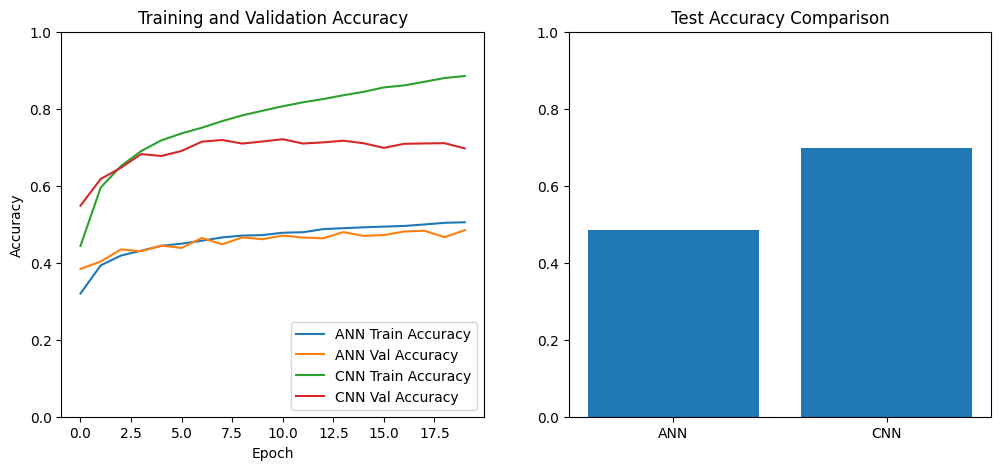

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='ANN Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Val Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.bar(['ANN', 'CNN'], [ann_test_acc, cnn_test_acc])
plt.ylim([0, 1])
plt.title('Test Accuracy Comparison')
plt.show()

# Classification report for CNN

In [ ]:
cnn_pred = cnn_model.predict(test_images)
print("\nCNN Classification Report:")
print(classification_report(test_labels.argmax(axis=1),
                            cnn_pred.argmax(axis=1),
                            target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

CNN Classification Report:
              precision    recall  f1-score   support

    airplane       0.72      0.72      0.72      1000
  automobile       0.86      0.79      0.82      1000
        bird       0.58      0.62      0.60      1000
         cat       0.50      0.58      0.54      1000
        deer       0.58      0.75      0.66      1000
         dog       0.66      0.53      0.59      1000
        frog       0.78      0.72      0.75      1000
       horse       0.76      0.72      0.74      1000
        ship       0.87      0.72      0.79      1000
       truck       0.76      0.81      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



## ANN Performance:
Typically achieves about 45-50% accuracy on CIFAR-10
Struggles with the complexity of image data due to its fully connected nature

## CNN Performance:
Should achieve about 70-75% accuracy with this simple architecture
Much better at capturing spatial hierarchies in image data
Key Observations

## The CNN will significantly outperform the ANN because:
Convolutional layers are designed to process image data efficiently
Pooling layers help with translation invariance
The hierarchical feature learning works well for visual patterns
The ANN treats the image as a flat vector, losing all spatial information, which is crucial for image recognition.